In [2]:
## Formulate/ Outline the problem
# The problem is to classify different classes of 
# images using a CNN

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from tensorflow import keras

import seaborn as sns
import pandas as pd

seed=42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
## Identify inputs and outputs
# Inputs are images in the train and test np arrays
# Outputs are class labels

# download from internet
# import urllib.request 
# urllib.request.urlretrieve("https://zenodo.org/records/10970014/files/train_images.npy?download=1", "/content/train_images.npy")
# urllib.request.urlretrieve("https://zenodo.org/records/10970014/files/train_labels.npy?download=1", "/content/train_labels.npy")
# urllib.request.urlretrieve("https://zenodo.org/records/10970014/files/test_images.npy?download=1", "/content/test_images.npy")
# urllib.request.urlretrieve("https://zenodo.org/records/10970014/files/test_labels.npy?download=1", "/content/test_labels.npy")
# train_images = np.load('/content/train_images.npy')
# train_labels = np.load('/content/train_labels.npy')
# test_images = np.load('/content/test_images.npy')
# test_labels = np.load('/content/test_labels.npy')

# !wget https://zenodo.org/api/records/10970014/files-archive
# !unzip -j files-archive

train_images = np.load('./dollar_street_10/train_images.npy')
train_labels = np.load('./dollar_street_10/train_labels.npy')
test_images = np.load('./dollar_street_10/test_images.npy')
test_labels = np.load('./dollar_street_10/test_labels.npy')


In [8]:
# Investigate the data and prepare
print(train_images.shape)
print(f'Min val: {train_images.min()}, Max val: {train_images.max()}')

print(train_labels.shape)
print(f'Min val: {train_labels.min()}, Max val: {train_labels.max()}')

# Normalize the values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Can be found here:
# https://carpentries-incubator.github.io/deep-learning-intro/4-advanced-layer-types.html

class_names = ['day bed', 'dishrag', 'plate', 'running shoe', 'soap dispenser',
                'street sign', 'table lamp', 'tile roof', 'toilet seat', 'washing machine']

(878, 64, 64, 3)
Min val: 0, Max val: 255
(878,)
Min val: 0, Max val: 9


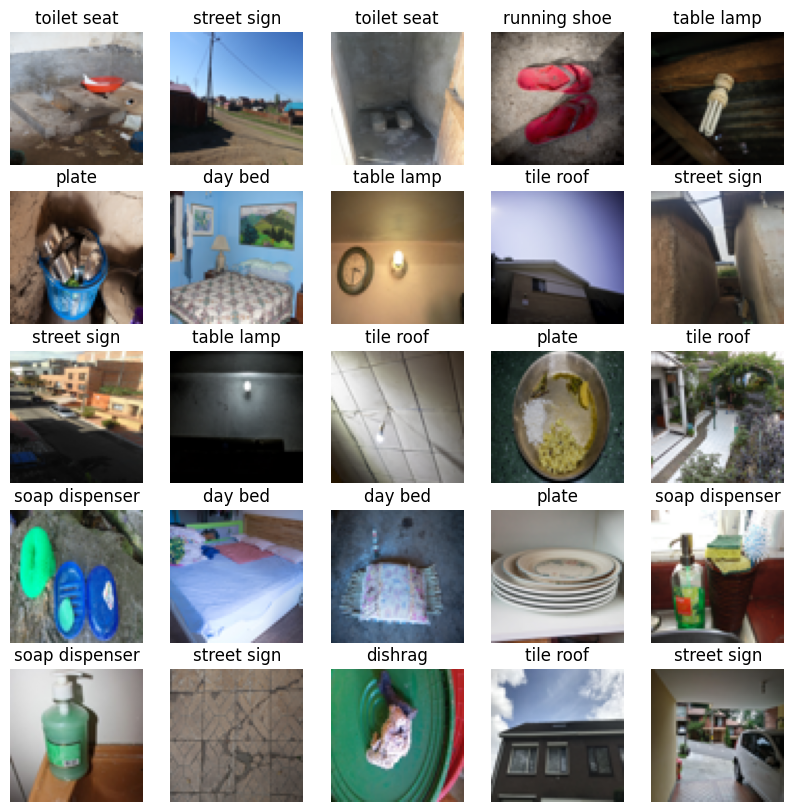

Number of features: 12288


In [9]:
#Plot Images in the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[train_labels[i]])
plt.show()

dim = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]
print(f'Number of features: {dim}')

In [ ]:
## Choose a loss function and optimizer
#Define model
def create_cnn():
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Conv2D(50, (2, 2), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (2, 2), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    return keras.Model(inputs=inputs, outputs=outputs, name="model_small")

## Show after CNN run
def create_nn():
    # Input layer
    inputs = keras.layers.Input(shape=(train_images.shape[1:]), name='input')

    # Dense layers
    #layers_dense1 = keras.layers.BatchNormalization()(inputs)
    layers_dense1 = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense2 = keras.layers.Dense(50, 'relu')(layers_dense1)
    
    #### Show after the initial run
    # layers_dense4 = keras.layers.Dense(25, 'relu')(layers_dense3)
    # layers_dense5 = keras.layers.Dense(5, 'relu')(layers_dense4)

    # Output layer
    flatten = keras.layers.Flatten()(layers_dense2)
    outputs = keras.layers.Dense(10)(flatten)

    # Defining the model and compiling it
    return keras.Model(inputs=inputs, outputs=outputs, name="model_batchnorm")

model = create_cnn()
model.summary()


model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 63, 63, 50)        650       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 50)        10050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 50)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 11250)             

Epoch 1/20
28/28 [==============================] - 5s 139ms/step - loss: 2.3073 - accuracy: 0.1458 - val_loss: 2.2967 - val_accuracy: 0.1092
Epoch 2/20
28/28 [==============================] - 4s 133ms/step - loss: 2.2371 - accuracy: 0.1697 - val_loss: 2.2103 - val_accuracy: 0.1775
Epoch 3/20
28/28 [==============================] - 4s 131ms/step - loss: 2.0816 - accuracy: 0.2813 - val_loss: 2.1451 - val_accuracy: 0.1980
Epoch 4/20
28/28 [==============================] - 4s 136ms/step - loss: 1.9160 - accuracy: 0.3212 - val_loss: 2.0965 - val_accuracy: 0.2526
Epoch 5/20
28/28 [==============================] - 4s 130ms/step - loss: 1.7370 - accuracy: 0.4100 - val_loss: 2.1219 - val_accuracy: 0.2935
Epoch 6/20
28/28 [==============================] - 4s 138ms/step - loss: 1.5084 - accuracy: 0.5148 - val_loss: 2.0808 - val_accuracy: 0.3038
Epoch 7/20
28/28 [==============================] - 4s 147ms/step - loss: 1.2899 - accuracy: 0.5661 - val_loss: 2.2036 - val_accuracy: 0.2969
Epoch 

c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


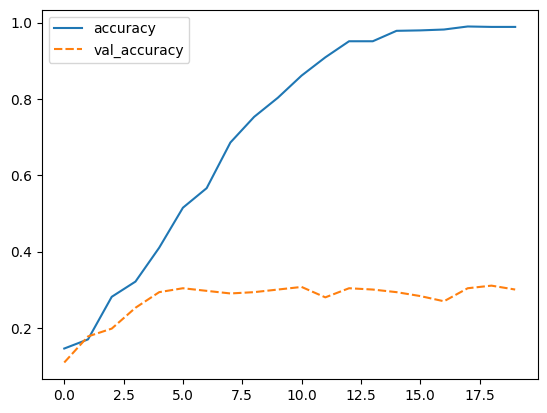

c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


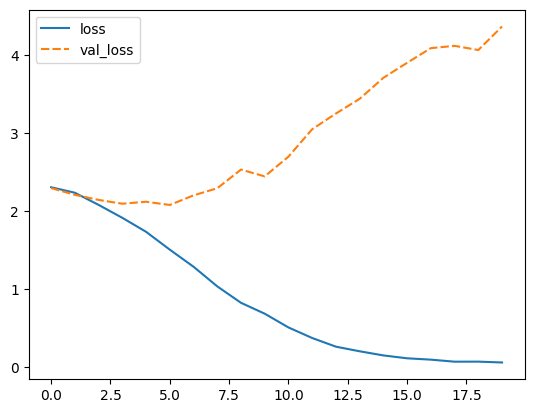

In [11]:
## Train the model
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.show()
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.show()

10/10 - 0s - loss: 4.3656 - accuracy: 0.3003 - 295ms/epoch - 30ms/step
Test acc: 30.034130811691284 %


c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


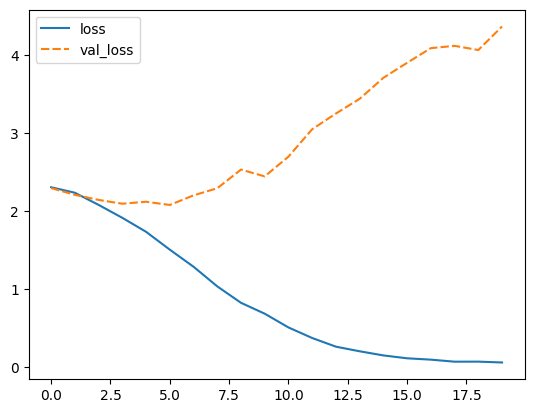

INFO:tensorflow:Assets written to: model_small\assets


INFO:tensorflow:Assets written to: model_small\assets


In [12]:
## Perform a Prediction/Classification
## and Measure Performance
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test acc: {test_acc * 100} %')
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.show()

# Tune HPs -> we will do it in the next step (Dropout)
# lets First Share/Deploy Model
model.save('model_small')

Model: "model_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 62, 62, 100)       2800      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 100)      0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 29, 29, 50)        45050     
                                                                 
 dropout_9 (Dropout)         (None, 29, 29, 50)        0         
                                                                 
 flatten_6 (Flatten)         (None, 42050)             0         
                                                     

c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


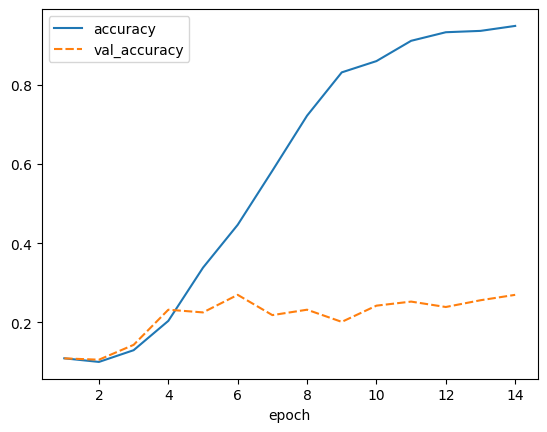

In [25]:
# Model Dropout
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(100, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Dropout(0.3)(x) # This is new!
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model_dropout = keras.Model(inputs=inputs, outputs=outputs, name="model_dropout")

model_dropout.summary()
model_dropout.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping

earlystopper = EarlyStopping('val_loss', patience=10)

history_dropout = model_dropout.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[earlystopper])

history_df = pd.DataFrame.from_dict(history_dropout.history)
history_df['epoch'] = range(1,len(history_df)+1)
history_df = history_df.set_index('epoch')
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.show()

10/10 - 1s - loss: 5.3640 - accuracy: 0.2696 - 527ms/epoch - 53ms/step
Test acc: 26.962456107139587 %


c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


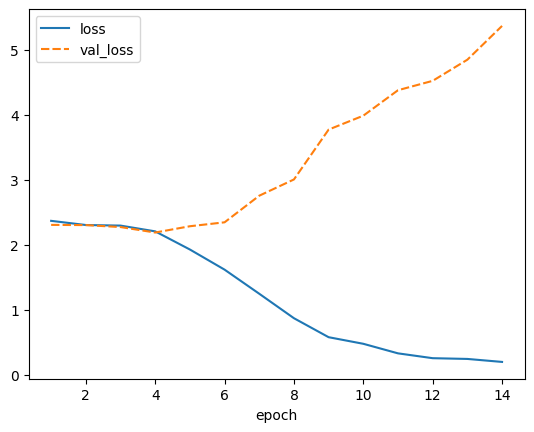

In [26]:
test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels, verbose=2)
print(f'Test acc: {test_acc * 100} %')
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.show()

In [15]:
# DenseNet121 prebuilt model - Transfer learning 
# input tensor
inputs = keras.Input(train_images.shape[1:])

# upscale layer
method = tf.image.ResizeMethod.BILINEAR
upscale = keras.layers.Lambda(
  lambda x: tf.image.resize_with_pad(x, 160, 160, method=method))(inputs)

base_model = keras.applications.DenseNet121(include_top=False,
                                            pooling='max',
                                            weights='imagenet',
                                            input_tensor=upscale,
                                            input_shape=(160,160,3),
                                            )

base_model.trainable = False

out = base_model.output
out = keras.layers.Flatten()(out)
out = keras.layers.BatchNormalization()(out)
out = keras.layers.Dense(50, activation='relu')(out)
out = keras.layers.Dropout(0.5)(out)
out = keras.layers.Dense(10)(out)

model = keras.models.Model(inputs=inputs, outputs=out, name = 'tfl_model')

Epoch 1/20
28/28 [==============================] - 9s 312ms/step - loss: 0.2703 - accuracy: 0.9146 - val_loss: 5.2285 - val_accuracy: 0.2287
Epoch 2/20
28/28 [==============================] - 8s 290ms/step - loss: 0.2728 - accuracy: 0.9157 - val_loss: 5.8965 - val_accuracy: 0.2184
Epoch 3/20
28/28 [==============================] - 8s 296ms/step - loss: 0.2462 - accuracy: 0.9317 - val_loss: 6.2829 - val_accuracy: 0.2287
Epoch 4/20
28/28 [==============================] - 8s 280ms/step - loss: 0.2139 - accuracy: 0.9317 - val_loss: 6.1282 - val_accuracy: 0.1945
Epoch 5/20
28/28 [==============================] - 7s 267ms/step - loss: 0.1217 - accuracy: 0.9636 - val_loss: 6.5897 - val_accuracy: 0.2253
Epoch 6/20
28/28 [==============================] - 8s 269ms/step - loss: 0.1098 - accuracy: 0.9692 - val_loss: 7.7369 - val_accuracy: 0.2628
Epoch 7/20
28/28 [==============================] - 7s 263ms/step - loss: 0.0962 - accuracy: 0.9692 - val_loss: 7.5846 - val_accuracy: 0.2491
Epoch 

c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


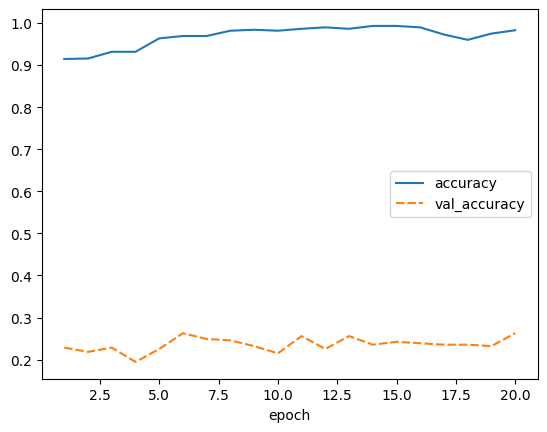

10/10 - 0s - loss: 8.0559 - accuracy: 0.2628 - 404ms/epoch - 40ms/step
Test acc: 26.279863715171814 %


c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


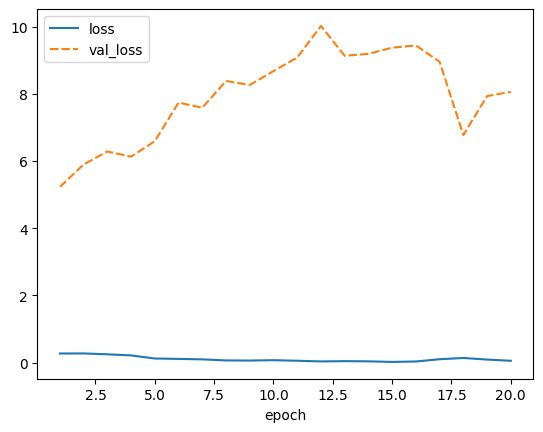

In [16]:
history_tfl = model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

history_df = pd.DataFrame.from_dict(history_tfl.history)
history_df['epoch'] = range(1,len(history_df)+1)
history_df = history_df.set_index('epoch')
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.show()

test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels, verbose=2)
print(f'Test acc: {test_acc * 100} %')
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.show()

In [17]:
##Compare with ML
from sklearn import svm

train_images_ml = train_images.reshape(-1, (64*64*3))
print(train_images_ml.shape)
svc=svm.SVC()
svc.fit(train_images_ml, (train_labels))

(878, 12288)


SVC()

In [18]:
from sklearn.metrics import accuracy_score
test_images_ml = test_images.reshape(-1, (64*64*3))
y_pred = svc.predict(test_images_ml)
print(accuracy_score(y_pred, test_labels))
#print(classification_report(y_pred, test_labels))

0.2525597269624573
